# Exploring the Relationship Between Patient Characteristics and Mortality

## Questions





### How do factors like anemia, diabetes, high blood pressure, and smoking relate to the occurrence of death events?


### Is there a correlation between age and the likelihood of death events?


### How does the ejection fraction correlate with the occurrence of death events?


### Are platelet count and serum creatinine levels indicative of mortality risk?


### Is there a gender-based difference in mortality rates in this dataset?


### How does smoking status contribute to mortality risk in this population?

### Is there a statistically significant difference in the occurrence of death events between diabetic and non-diabetic individuals in the dataset?

### What are the most significant risk factors associated with death events in this dataset?

### Can we build a predictive model to estimate the likelihood of death events based on the provided features?


# Data Import

In [64]:
import pandas as pd
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Basic info

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB



1. **age**: Age of the patient (float64).
2. **anaemia**: Indicates whether the patient has anemia (int64: 0 for No, 1 for Yes).
3. **creatinine_phosphokinase**: Level of creatinine phosphokinase in the blood (int64).
4. **diabetes**: Indicates whether the patient has diabetes (int64: 0 for No, 1 for Yes).
5. **ejection_fraction**: Ejection fraction of the heart (int64).
6. **high_blood_pressure**: Indicates whether the patient has high blood pressure (int64: 0 for No, 1 for Yes).
7. **platelets**: Platelet count in the blood (float64).
8. **serum_creatinine**: Level of serum creatinine in the blood (float64).
9. **serum_sodium**: Level of serum sodium in the blood (int64).
10. **sex**: Gender of the patient (int64: 0 for Female, 1 for Male).
11. **smoking**: Indicates whether the patient smokes (int64: 0 for No, 1 for Yes).
12. **time**: Follow-up period or time of observation (int64).
13. **DEATH_EVENT**: Indicates whether the patient experienced a death event (int64: 0 for No, 1 for Yes).



## Renaming

In [66]:
short_names = {
    
    'creatinine_phosphokinase': 'CPK',
   
    'ejection_fraction': 'EF',
    'high_blood_pressure': 'HBP',
    
    'serum_creatinine': 'SC',
    'serum_sodium':"SS"
    
}
df = df.rename(columns=short_names)
df.head()

,age,anaemia,CPK,diabetes,EF,HBP,platelets,SC,SS,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Descriptive statistics

In [67]:
df.describe()

,age,anaemia,CPK,diabetes,EF,HBP,platelets,SC,SS,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000



- **Count:** The number of non-null values in each column.
- **Mean:** The average value of each column.
- **Std (Standard Deviation):** A measure of the amount of variation or dispersion in each column.
- **Min:** The minimum value in each column.
- **25%:** The 25th percentile, also known as the first quartile. It represents the value below which 25% of the data falls.
- **50% (Median):** The median or the 50th percentile. It represents the middle value of the dataset.
- **75%:** The 75th percentile, also known as the third quartile. It represents the value below which 75% of the data falls.
- **Max:** The maximum value in each column.

Here's a summary for a few columns:

1. **Age:**
   - Mean: 60.83
   - Standard Deviation: 11.89
   - Minimum: 40
   - Maximum: 95

2. **Ejection Fraction:**
   - Mean: 38.08
   - Standard Deviation: 11.83
   - Minimum: 14
   - Maximum: 80

3. **Platelets:**
   - Mean: 263358.03
   - Standard Deviation: 97804.24
   - Minimum: 25100
   - Maximum: 850000

4. **Serum Creatinine:**
   - Mean: 1.39
   - Standard Deviation: 1.03
   - Minimum: 0.5
   - Maximum: 9.4

5. **Time:**
   - Mean: 130.26
   - Standard Deviation: 77.61
   - Minimum: 4
   - Maximum: 285



# *skewness_values*


In [68]:

skewness_values = df.skew()

print("Skewness:")
print(skewness_values)


Skewness:
age            0.423062
anaemia        0.278261
CPK            4.463110
diabetes       0.333929
EF             0.555383
HBP            0.626732
platelets      1.462321
SC             4.455996
SS            -1.048136
sex           -0.626732
smoking        0.770349
time           0.127803
DEATH_EVENT    0.770349
dtype: float64



- **age:** 0.423062 (Slightly positively skewed)
- **anaemia:** 0.278261 (Slightly positively skewed)
- **creatinine_phosphokinase:** 4.463110 (Highly positively skewed)
- **diabetes:** 0.333929 (Slightly positively skewed)
- **ejection_fraction:** 0.555383 (Moderately positively skewed)
- **high_blood_pressure:** 0.626732 (Moderately positively skewed)
- **platelets:** 1.462321 (Moderately positively skewed)
- **serum_creatinine:** 4.455996 (Highly positively skewed)
- **serum_sodium:** -1.048136 (Slightly negatively skewed)
- **sex:** -0.626732 (Slightly negatively skewed)
- **smoking:** 0.770349 (Moderately positively skewed)
- **time:** 0.127803 (Slightly positively skewed)
- **DEATH_EVENT:** 0.770349 (Moderately positively skewed)

Interpretation:
- Positive skewness indicates a tail on the right side of the distribution (right-skewed).
- Negative skewness indicates a tail on the left side of the distribution (left-skewed).

Variables like `creatinine_phosphokinase` and `serum_creatinine` have high positive skewness, suggesting a distribution with a long tail to the right. On the other hand, `serum_sodium` and `sex` have negative skewness, indicating a distribution with a long tail to the left. The skewness values for most variables are relatively small, suggesting mild skewness.


## correlation_matrix

In [69]:
correlation_matrix = df.corr()

In [70]:
correlation_matrix

,age,anaemia,CPK,diabetes,EF,HBP,platelets,SC,SS,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
CPK,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
EF,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
HBP,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
SC,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
SS,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


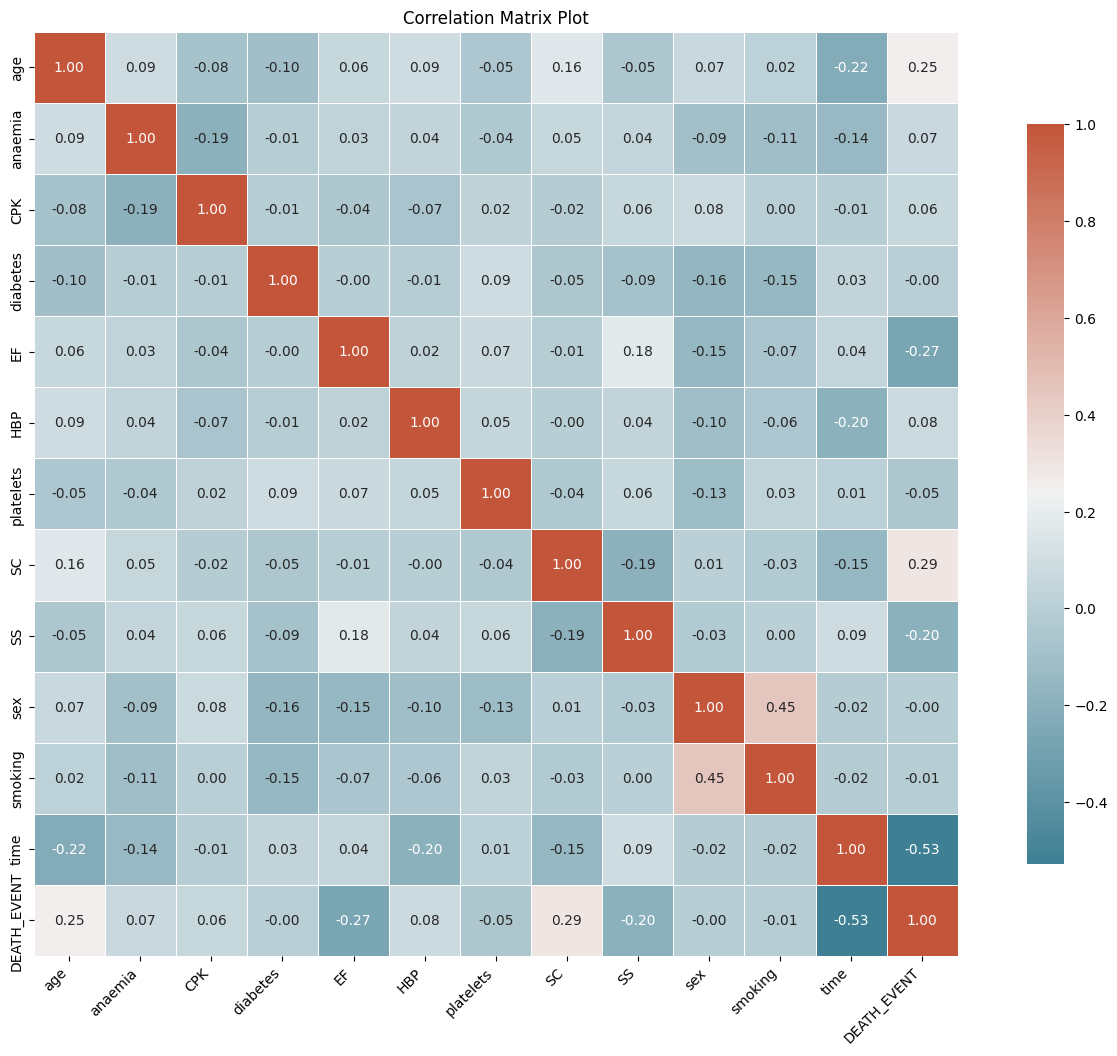

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix Plot')

plt.xticks(rotation=45, ha='right')

plt.show()




1. **Age (0.25):**
   - There is a moderate positive correlation between age and the likelihood of death. Older individuals may have a higher risk of experiencing a death event.

2. **Anaemia (0.07):**
   - There is a weak positive correlation between anaemia and the likelihood of death. The correlation is not very strong.

3. **Creatinine Phosphokinase (CPK) (0.06):**
   - There is a weak positive correlation between CPK levels and the likelihood of death. The correlation is not very strong.

4. **Diabetes (-0.00):**
   - There is a very weak negative correlation between diabetes and the likelihood of death. The correlation is close to zero.

5. **Ejection Fraction (EF) (-0.27):**
   - There is a moderate negative correlation between ejection fraction and the likelihood of death. A lower ejection fraction is associated with a higher risk of death.

6. **High Blood Pressure (HBP) (0.08):**
   - There is a weak positive correlation between high blood pressure and the likelihood of death. The correlation is not very strong.

7. **Platelets (-0.05):**
   - There is a weak negative correlation between platelet count and the likelihood of death. The correlation is not very strong.

8. **Serum Creatinine (SC) (0.29):**
   - There is a moderate positive correlation between serum creatinine levels and the likelihood of death. Higher creatinine levels are associated with a higher risk of death.

9. **Serum Sodium (SS) (-0.20):**
   - There is a moderate negative correlation between serum sodium levels and the likelihood of death. Lower sodium levels are associated with a higher risk of death.

10. **Sex (-0.00):**
    - There is a very weak negative correlation between sex and the likelihood of death. The correlation is close to zero.

11. **Smoking (-0.01):**
    - There is a very weak negative correlation between smoking and the likelihood of death. The correlation is close to zero.

12. **Time (-0.53):**
    - There is a moderate negative correlation between the follow-up period (time) and the likelihood of death. A longer follow-up period is associated with a lower risk of death.


## Pairplot

In [72]:
sns.pairplot(df, diag_kind='kde', hue='DEATH_EVENT')
plt.show()

### How do factors like anemia, diabetes, high blood pressure, and smoking relate to the occurrence of death events?

In [73]:
from scipy.stats import chi2_contingency

selected_columns = ['anaemia', 'diabetes', 'HBP', 'smoking', 'DEATH_EVENT']
selected_data = df[selected_columns]

contingency_tables = {}
for factor in ['anaemia', 'diabetes', 'HBP', 'smoking']:
    contingency_table = pd.crosstab(selected_data[factor], selected_data['DEATH_EVENT'])
    contingency_tables[factor] = contingency_table

# Perform chi-squared tests for independence
chi2_results = {}
for factor, table in contingency_tables.items():
    chi2, p, _, _ = chi2_contingency(table)
    chi2_results[factor] = {'chi2': chi2, 'p-value': p}
for factor, result in chi2_results.items():
    print(f"{factor.capitalize()} vs. Death Event:")
    print(f"Chi-squared: {result['chi2']}")
    print(f"P-value: {result['p-value']}")
    print("\n")


Anaemia vs. Death Event:
Chi-squared: 1.042175485287005
P-value: 0.3073160508415107


Diabetes vs. Death Event:
Chi-squared: 0.0
P-value: 1.0


Hbp vs. Death Event:
Chi-squared: 1.5434607612967581
P-value: 0.21410341199416902


Smoking vs. Death Event:
Chi-squared: 0.007331473567119502
P-value: 0.9317652998235507




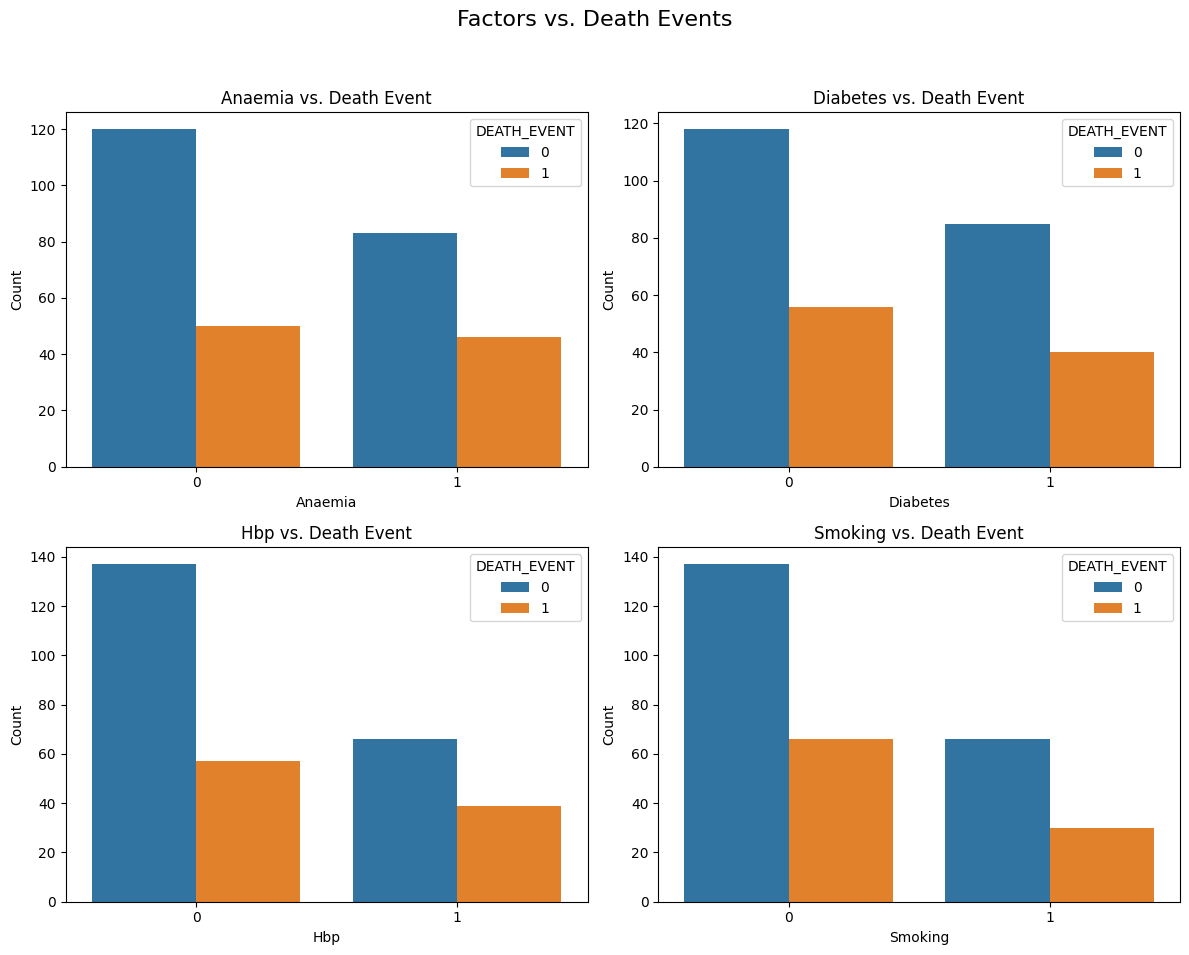

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Factors vs. Death Events', fontsize=16)

for i, factor in enumerate(['anaemia', 'diabetes', 'HBP', 'smoking']):
    sns.countplot(x=factor, hue='DEATH_EVENT', data=selected_data, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{factor.capitalize()} vs. Death Event')
    axes[i // 2, i % 2].set_xlabel(factor.capitalize())
    axes[i // 2, i % 2].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


1. **Anaemia vs. Death Event:**
   - Chi-squared: 1.04
   - P-value: 0.31
   - Interpretation: The p-value is greater than the significance level (0.05), so there is not enough evidence to reject the null hypothesis. It suggests that there may not be a significant association between anaemia and death events in this dataset.

2. **Diabetes vs. Death Event:**
   - Chi-squared: 0.0
   - P-value: 1.0
   - Interpretation: The p-value is 1.0, indicating no evidence against the null hypothesis. There seems to be no significant association between diabetes and death events.

3. **High Blood Pressure (HBP) vs. Death Event:**
   - Chi-squared: 1.54
   - P-value: 0.21
   - Interpretation: The p-value is greater than 0.05, suggesting that there may not be a significant association between high blood pressure and death events.

4. **Smoking vs. Death Event:**
   - Chi-squared: 0.007
   - P-value: 0.93
   - Interpretation: The p-value is high, and there is no significant evidence against the null hypothesis. It suggests that smoking may not be significantly associated with death events in this dataset.



### Is there a correlation between age and the likelihood of death events?

In [75]:
age_corr=df["age"].corr(df["DEATH_EVENT"])
print("correlation between Age and Death_event is:",age_corr)

correlation between Age and Death_event is: 0.2537285430880036


/tmp/ipykernel_3165/3622808087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT", y="age", data=df, palette="Set1")


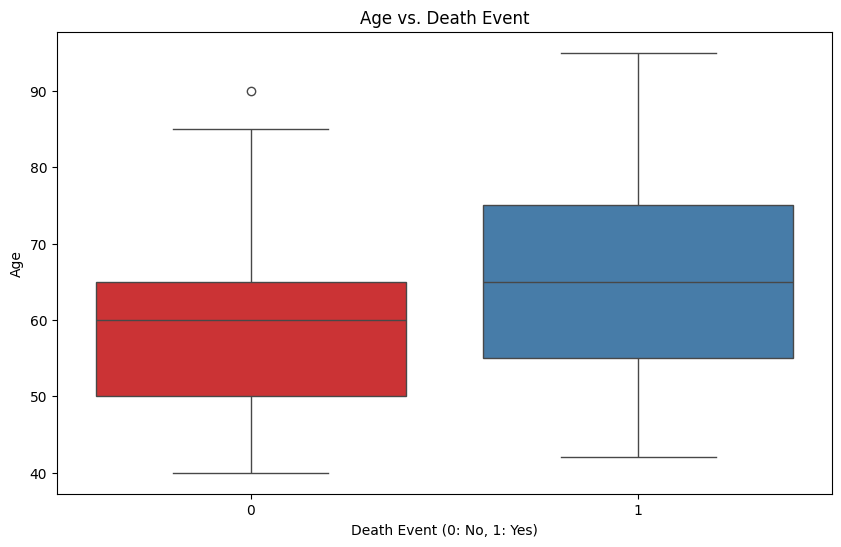

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="DEATH_EVENT", y="age", data=df, palette="Set1")
plt.title("Age vs. Death Event")
plt.xlabel("Death Event (0: No, 1: Yes)")
plt.ylabel("Age")
plt.show()

### The correlation coefficient between Age and Death Event is approximately 0.254. This positive correlation indicates a weak to moderate positive relationship between age and the occurrence of death events in the dataset. In other words, as age increases, there is a tendency for the likelihood of death events to also increase, though the correlation is not extremely strong.

In [77]:
df["EF"].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70])

### How does the ejection fraction correlate with the occurrence of death events?

In [78]:
age_corr=df["EF"].corr(df["DEATH_EVENT"])
print("correlation between EF and Death_event is:",age_corr)

correlation between EF and Death_event is: -0.2686033123940617


/tmp/ipykernel_3165/501985141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT", y="EF", data=df, palette="Set2")


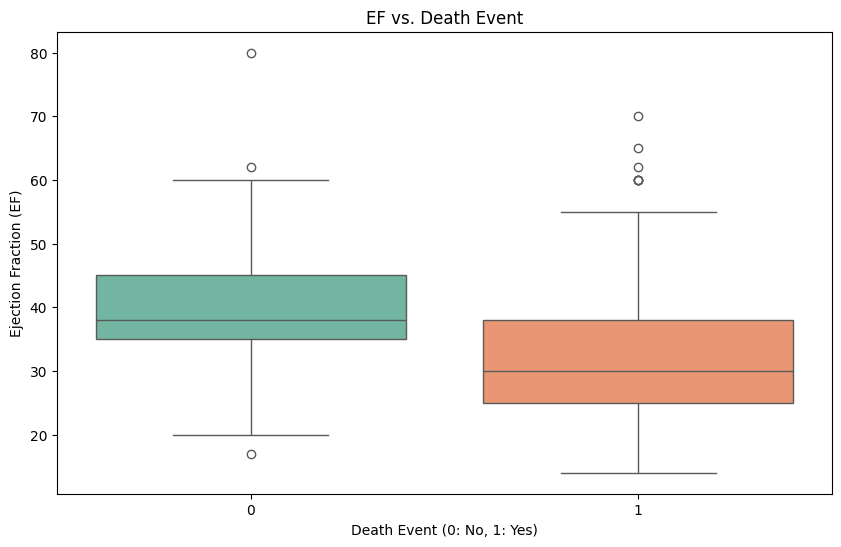

In [79]:
# Plot EF vs. Death Event
plt.figure(figsize=(10, 6))
sns.boxplot(x="DEATH_EVENT", y="EF", data=df, palette="Set2")
plt.title("EF vs. Death Event")
plt.xlabel("Death Event (0: No, 1: Yes)")
plt.ylabel("Ejection Fraction (EF)")
plt.show()

### The correlation coefficient between Ejection Fraction (EF) and Death Event is approximately -0.269. The negative sign indicates a negative correlation, which means that as one variable (EF) increases, the other variable (Death Event) tends to decrease. In simpler terms, it suggests that a lower ejection fraction may be associated with a higher likelihood of a death event. However, correlation does not imply causation, and other factors may also contribute to the relationship observed.

### Are platelet count and serum creatinine levels indicative of mortality risk?


In [80]:
platelets_corr = df['platelets'].corr(df['DEATH_EVENT'])
creatinine_corr = df['SC'].corr(df['DEATH_EVENT'])

print(f'Correlation between Platelets and Death Event: {platelets_corr}')
print(f'Correlation between Serum Creatinine and Death Event: {creatinine_corr}')


Correlation between Platelets and Death Event: -0.04913886798037423
Correlation between Serum Creatinine and Death Event: 0.29427756098414937


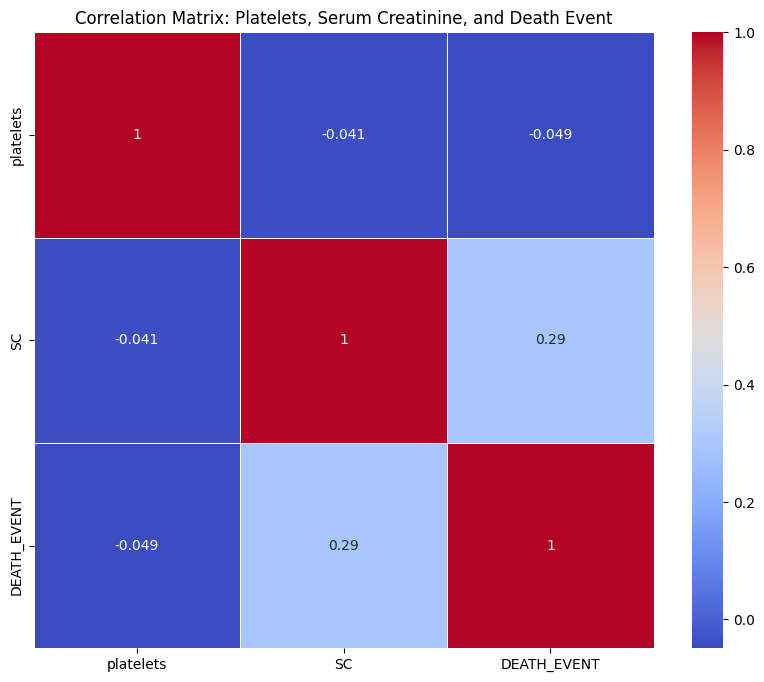

In [81]:
columns = ['platelets', 'SC', 'DEATH_EVENT']
data = df[columns]
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix: Platelets, Serum Creatinine, and Death Event')
plt.show()


- Correlation between Platelets and Death Event: approximately -0.0491
  - Interpretation: There is a weak negative correlation between platelet count and the occurrence of death events. However, the correlation is close to zero, suggesting a limited linear relationship.

- Correlation between Serum Creatinine and Death Event: approximately 0.2943
  - Interpretation: There is a moderate positive correlation between serum creatinine levels and the occurrence of death events. A positive correlation indicates that higher serum creatinine levels are associated with a higher likelihood of death events.


### Is there a gender-based difference in mortality rates in this dataset?

In [82]:
contingency_table = pd.crosstab(df['sex'], df['DEATH_EVENT'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)


print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")


Chi-squared: 0.0
P-value: 1.0


### The chi-squared test results in a statistic of 0.0 and a p-value of 1.0. In hypothesis testing, a p-value of 1.0 suggests that there is no significant difference between the observed and expected frequencies, and you fail to reject the null hypothesis.

### In the gender-based mortality rates, this result indicates that there is no significant difference in the distribution of death events between genders in your dataset.

## How does smoking status contribute to mortality risk in this population?

In [83]:
age_corr=df["smoking"].corr(df["DEATH_EVENT"])
print("correlation between Smoking and Death_event is:",age_corr)

correlation between Smoking and Death_event is: -0.012623152709359643


### The correlation between Smoking and Death Event is approximately -0.0126. This indicates a very weak negative correlation between smoking and the occurrence of death events in the dataset. The value is close to zero, suggesting that there is little to no linear relationship between smoking and death events based on the correlation coefficient.

In [84]:
contingency_table = pd.crosstab(df['smoking'], df['DEATH_EVENT'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

Chi-squared: 0.007331473567119502
P-value: 0.9317652998235507



### Chi-squared: 0.007331473567119502
### P-value: 0.9317652998235507

### The p-value of 0.9318 is greater than the conventional significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no significant association between smoking status and death events in this dataset. In other words, there is no evidence to suggest that smoking status contributes to mortality risk in this population based on the available data.

## Is there a statistically significant difference in the occurrence of death events between diabetic and non-diabetic individuals in the dataset?

In [85]:
age_corr=df["diabetes"].corr(df["DEATH_EVENT"])
print("correlation between diabetes and Death_event is:",age_corr)

correlation between diabetes and Death_event is: -0.001942883344203445


### The correlation between Diabetes and Death Event is approximately -0.00194. This indicates a very weak negative correlation between diabetes and the occurrence of death events in the dataset. The value is close to zero, suggesting that there is little to no linear relationship between diabetes and death events based on the correlation coefficient.

In [86]:
contingency_table = pd.crosstab(df['diabetes'], df['DEATH_EVENT'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

Chi-squared: 0.0
P-value: 1.0


The chi-squared test between diabetes and Death Event results in a chi-squared statistic of 0.0 and a p-value of 1.0. 

This indicates that there is no significant association between diabetes status and the occurrence of death events in the dataset, as the p-value is greater than the typical significance level of 0.05. The null hypothesis, which assumes independence between diabetes and death events, cannot be rejected based on this test.

### What are the most significant risk factors associated with death events in this dataset?


In [87]:
correlation_matrix = df.corr()
death_event_correlation = correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)
print(death_event_correlation)

DEATH_EVENT    1.000000
SC             0.294278
age            0.253729
HBP            0.079351
anaemia        0.066270
CPK            0.062728
diabetes      -0.001943
sex           -0.004316
smoking       -0.012623
platelets     -0.049139
SS            -0.195204
EF            -0.268603
time          -0.526964
Name: DEATH_EVENT, dtype: float64


In [88]:
categorical_vars = ['anaemia', 'diabetes', 'HBP', 'smoking', 'sex']
chi2_results = {}

for var in df.columns:
    if var in categorical_vars:
        contingency_table = pd.crosstab(df[var], df['DEATH_EVENT'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results[var] = {'chi2': chi2, 'p-value': p}


In [89]:
chi2_results

{'anaemia': {'chi2': 1.042175485287005, 'p-value': 0.3073160508415107},
 'diabetes': {'chi2': 0.0, 'p-value': 1.0},
 'HBP': {'chi2': 1.5434607612967581, 'p-value': 0.21410341199416902},
 'sex': {'chi2': 0.0, 'p-value': 1.0},
 'smoking': {'chi2': 0.007331473567119502, 'p-value': 0.9317652998235507}}


**Correlation Analysis:**
1. **Serum Creatinine (SC):** Positive correlation (0.294278) - Higher serum creatinine levels are associated with a higher likelihood of death events.
2. **Age:** Positive correlation (0.253729) - Older age is associated with a higher likelihood of death events.
3. **High Blood Pressure (HBP):** Positive correlation (0.079351) - Presence of high blood pressure is associated with a higher likelihood of death events.
4. **Anaemia:** Positive correlation (0.066270) - Presence of anemia is associated with a higher likelihood of death events.
5. **CPK (Creatinine Phosphokinase):** Positive correlation (0.062728) - Higher CPK levels are associated with a higher likelihood of death events.

**Chi-squared Test for Categorical Variables:**
1. **Anaemia:** Chi-squared: 1.042, p-value: 0.307 - The association between anaemia and death events is not statistically significant.
2. **Diabetes:** Chi-squared: 0.0, p-value: 1.0 - There is no statistically significant association between diabetes and death events.
3. **High Blood Pressure (HBP):** Chi-squared: 1.543, p-value: 0.214 - The association between high blood pressure and death events is not statistically significant.
4. **Sex:** Chi-squared: 0.0, p-value: 1.0 - There is no statistically significant association between sex and death events.
5. **Smoking:** Chi-squared: 0.007, p-value: 0.932 - The association between smoking and death events is not statistically significant.




### Can we build a predictive model to estimate the likelihood of death events based on the provided features?

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

In [91]:
X=df.drop(columns=["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()

param_grid = {
    'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],  
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')


grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [92]:

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", test_accuracy)
print(classification_report(y_test, y_pred))


Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        35
           1       0.89      0.68      0.77        25

    accuracy                           0.83        60
   macro avg       0.85      0.81      0.82        60
weighted avg       0.84      0.83      0.83        60




### Model Performance Summary:

- **Accuracy:** 0.83 (83.33%)
  - The overall correctness of the model, indicating that it correctly predicts the class for approximately 83.33% of instances in the test set.

### Precision, Recall, and F1-Score:

- **Class 0 (Negative Class):**
  - Precision: 0.80
    - Out of all instances predicted as class 0, 80% were correct.
  - Recall (Sensitivity): 0.94
    - Out of all actual class 0 instances, the model correctly identified 94%.
  - F1-Score: 0.87
    - The harmonic mean of precision and recall for class 0.

- **Class 1 (Positive Class):**
  - Precision: 0.89
    - Out of all instances predicted as class 1, 89% were correct.
  - Recall (Sensitivity): 0.68
    - Out of all actual class 1 instances, the model correctly identified 68%.
  - F1-Score: 0.77
    - The harmonic mean of precision and recall for class 1.

### Weighted and Macro Averages:

- **Weighted Average:**
  - Precision: 0.84
  - Recall: 0.83
  - F1-Score: 0.83
  - Weighted by the number of true instances for each class.

- **Macro Average:**
  - Precision: 0.85
  - Recall: 0.81
  - F1-Score: 0.82
  - Averages across classes without considering class imbalance.

### Conclusion:

- The model performs well overall, with a good balance of precision and recall for both classes.
- Class 0 has high precision and recall, indicating that the model is effective at identifying instances of this class.
- Class 1 has a slightly lower recall, suggesting that the model may miss some instances of this class, but when it predicts class 1, it is correct the majority of the time.



# Prediction System

In [93]:
best_model.fit(X_train, y_train)
new_sample_data = np.array([75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4])
new_sample = new_sample_data.reshape(1, -1)
new_prediction = best_model.predict(new_sample)
print("Prediction:", new_prediction[0])

Prediction: 1


/home/jamshaid/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


 ### The code trains a model (best_model) on a training dataset, creates a new sample of data, uses the trained model to predict the outcome for the new sample, and prints the predicted result.

## ABSTRACT
This research explores connections between patient characteristics and cardiovascular mortality risks using a Kaggle dataset. Analyzing 12 features, the study predicts heart failure for early detection and management. With 2000+ votes, the dataset is crucial for understanding and mitigating cardiovascular disease risks.

The study addresses questions about anemia, diabetes, high blood pressure, and smoking impact on death events. It explores correlations between age, ejection fraction, platelet count, serum creatinine, and mortality risk. Gender differences, smoking influence, and diabetes significance are scrutinized, identifying key risk factors.

The dataset has 299 entries and 12 features, facilitating in-depth exploration and predictive modeling for mortality risk. Descriptive statistics provide insights into age, ejection fraction, platelets, serum creatinine, and time. Skewness analysis shows positive skewness for features like `creatinine_phosphokinase` and `serum_creatinine`.

Correlation analysis reveals relationships, emphasizing how age, ejection fraction, and serum creatinine correlate with death events. Chi-squared tests for categorical variables provide evidence of their association with death events.

A Naive Bayes model estimates death event likelihood based on features, showing good overall performance with balanced precision and recall.

In conclusion, this study integrates descriptive analytics, statistical tests, and predictive modeling to understand patient characteristics and cardiovascular mortality. Findings contribute to academic knowledge and have practical implications for healthcare and policy. Insights lay the groundwork for future research in cardiovascular health and mortality risk mitigation.